In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#fashion_mnist = tf.keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
'''
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

'''
#taken from official Pytorch documentation for FashionMNIST

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

images, labels = next(iter(trainloader))



In [13]:
from torch import optim


model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

model.to(device)
criterion = nn.NLLLoss()  #Negative log-likelihood loss, used with logSoftmax activation
optimizer = optim.Adam(model.parameters(), lr=0.003)    #Adam optimisation does better than SGD due to changing learnrates

torch.set_grad_enabled(True)    #Store the gradients for all operations


count = 0
correct = 0
loss_tensor = []
accuracy = []

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()   #back-propagation done using autograd
        optimizer.step()  #update the weights for each layer

        ps = torch.argmax(torch.exp(model(images)),dim=1).to(device)    #we need to apply exp as we used logSoftmax, and then find the class with the maximum probability
        correct += torch.eq(ps,labels).sum().item()   #no of correct predictions
        count += torch.numel(labels)    #no. of elements per batch
        running_loss += loss.item()
        loss_tensor.append(running_loss/len(testloader))
        accuracy.append((correct*100.0)/count)

    else:
        print(f"Training loss: {running_loss/len(trainloader)}")




Training loss: 0.5032806059540208
Training loss: 0.37524702666061266
Training loss: 0.33598637867615677
Training loss: 0.3167994542003695
Training loss: 0.30266417132448287
Training loss: 0.29148315656175616
Training loss: 0.2797167612942678
Training loss: 0.27263370432706274
Training loss: 0.2626236168496898
Training loss: 0.2527519720537004


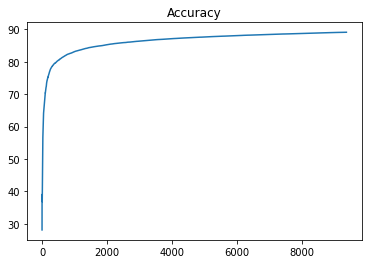

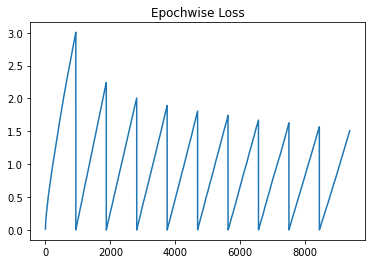

In [14]:
plt.plot(accuracy)
plt.title("Accuracy")
plt.show()

plt.plot(loss_tensor)
plt.title("Epochwise Loss")
plt.show()    #the peaks of the loss graph are where we move to a new epoch, we can clearly see the loss per epoch decreasing

Predicted Label: T-shirt/top
Correct label: T-shirt/top


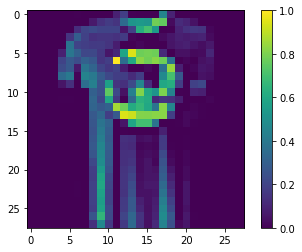

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

torch.set_grad_enabled(False)

i=0   #set it to any value in [0,63], doesn't matter as it's shuffled each time
img=images[i].view(images[i].shape[0],-1)
ps = torch.exp(model(img))
torch.reshape(images,(-1,28,28))

print('Predicted Label:',class_names[torch.argmax(ps)])
print('Correct label:', class_names[labels[i]])
plt.figure()
plt.imshow(img.view(28,28))
plt.colorbar()
plt.grid(False)
plt.show()




In [16]:


count = 0
correct = 0
loss_tensor = []
accuracy = []
test_epochs = 1
for e in range(test_epochs):
    running_loss = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
        output = model(images)
        loss = criterion(output, labels)
        ps = torch.argmax(torch.exp(model(images)),dim=1).to(device)
        correct += torch.eq(ps,labels).sum().item()
        count += torch.numel(labels)
        running_loss += loss.item()
        loss_tensor.append(running_loss/len(testloader))
        accuracy.append((correct*100.0)/count)
        
    else:
        print(f"Test loss: {running_loss/len(testloader)}")
        print("OVerall accuracy over test set is ", sum(accuracy)/len(accuracy))


Test loss: 0.37027667182835805
OVerall accuracy over test set is  87.74485341475543
